In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score



In [2]:
df=pd.read_csv('../data/heart-disease.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

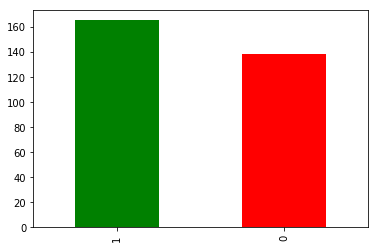

In [6]:
df.target.value_counts().plot(kind='bar',color=['green','red'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


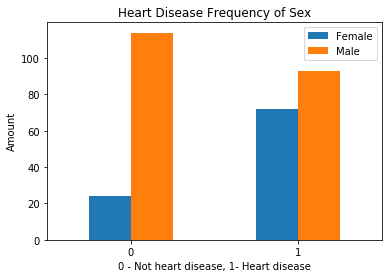

In [10]:
pd.crosstab(df.target,df.sex).plot(kind='bar')
plt.title("Heart Disease Frequency of Sex")
plt.xlabel("0 - Not heart disease, 1- Heart disease")
plt.ylabel("Amount")
plt.legend(['Female','Male'])
plt.xticks(rotation=0); 

# Age Vs Max Heart rate Heart Disease

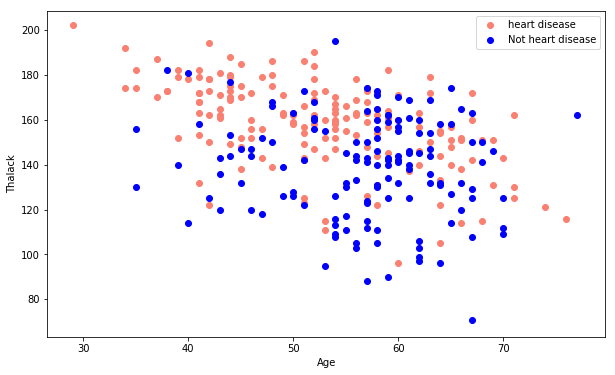

In [11]:
fig,ax=plt.subplots(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')
plt.xlabel("Age")
plt.ylabel("Thalack")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c='blue')
plt.legend(['heart disease', 'Not heart disease']); 

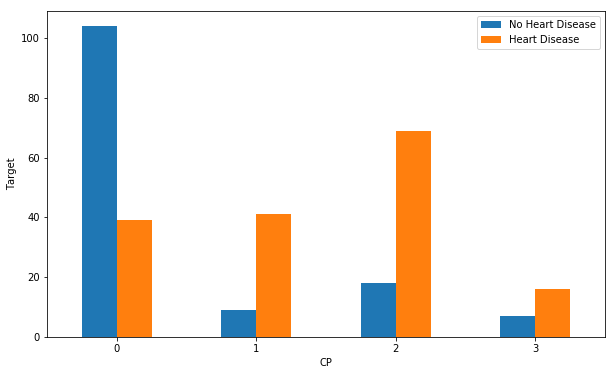

In [12]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6))
plt.xlabel("CP")
plt.ylabel("Target")
plt.legend(["No Heart Disease", "Heart Disease"]); 
plt.xticks(rotation=0); 

In [13]:
corelation=df.corr()
corelation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


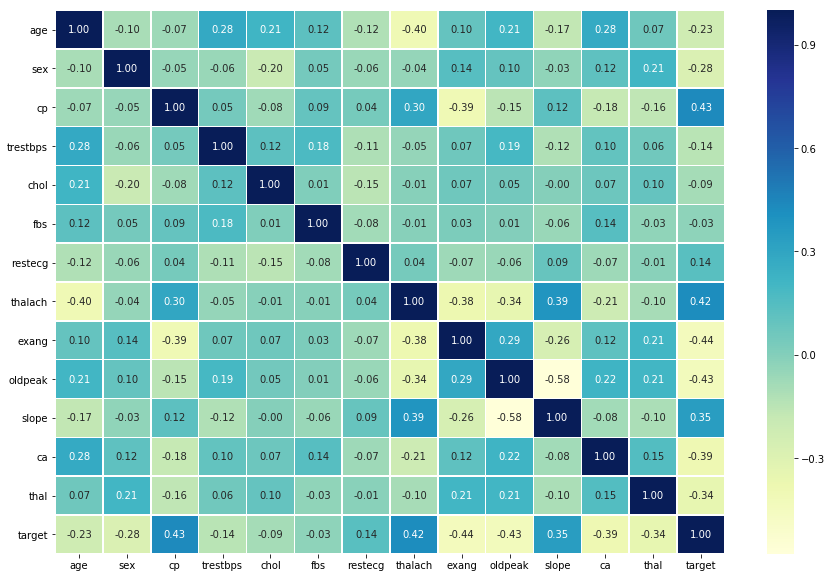

In [14]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(corelation,annot=True,linewidth=0.5, fmt='.2f',cmap="YlGnBu"); 

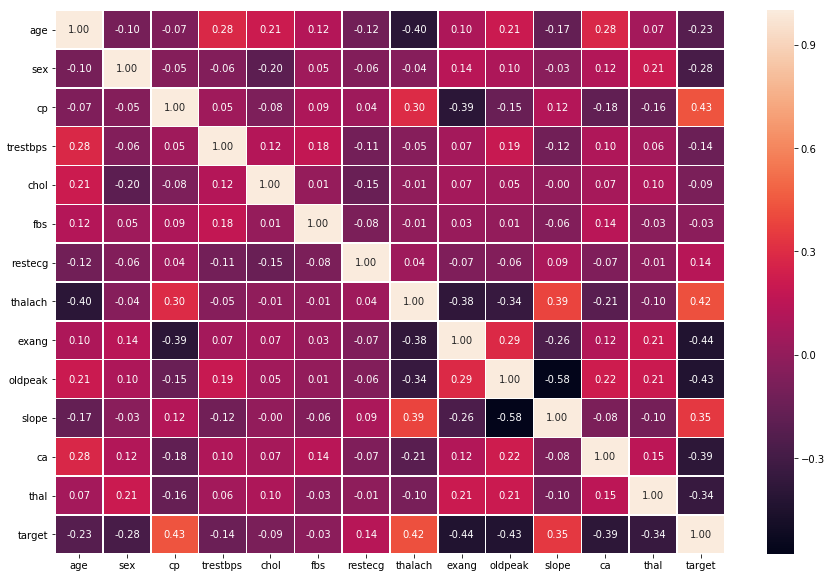

In [15]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corelation,linewidth=.5,annot=True,fmt=".2f"); 

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
x=df.drop('target',axis=1)
y=df['target']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [19]:
models={'logisticRegression':LogisticRegression(),
       'KNeighborsClassifier':KNeighborsClassifier(),
       'RandomForestClassifier':RandomForestClassifier()}



In [20]:
def fit_and_socre(models,x_train,x_test,y_train,y_test):
    results={}
    for model_name,model in models.items(): 
        model.fit(x_train,y_train)
        score=model.score(x_test,y_test)
        results[model_name]=round(score,2)
    return results;
    

In [21]:
np.random.seed(42)
result=fit_and_socre(models,x_train,x_test,y_train,y_test)
result

C:\Users\Md Hadiuzzaman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Md Hadiuzzaman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'logisticRegression': 0.85,
 'KNeighborsClassifier': 0.56,
 'RandomForestClassifier': 0.82}

In [22]:
model_comp=pd.DataFrame(result,index=["Accuracy"])
model_comp

,logisticRegression,KNeighborsClassifier,RandomForestClassifier
Accuracy,0.85,0.56,0.82


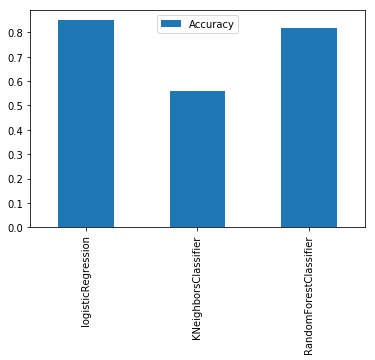

In [23]:
model_comp.T.plot.bar(); 

In [24]:
for model_n,model in models.items(): 
    print(f"Model Name: {model_n}")
    print(model.get_params())

Model Name: logisticRegression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model Name: KNeighborsClassifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Model Name: RandomForestClassifier
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [25]:
train_score=[]
test_score=[]

knn=KNeighborsClassifier()
neighbors=range(1,21)

for i in neighbors: 
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))


In [26]:
max(train_score), max(test_score)

(1.0, 0.6229508196721312)

Text(0, 0.5, 'accuracy')

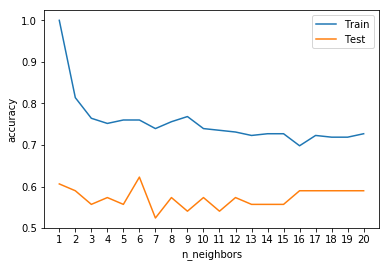

In [27]:
plt.plot(neighbors,train_score); 
plt.plot(neighbors,test_score); 
plt.legend(['Train',"Test"]); 
plt.xticks(np.arange(1,21,1))
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

In [28]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.5737704918032787

In [29]:
result

{'logisticRegression': 0.85,
 'KNeighborsClassifier': 0.56,
 'RandomForestClassifier': 0.82}

In [33]:
np.logspace(-1,1,3)

array([ 0.1,  1. , 10. ])

In [38]:

log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

gs_log_reg=GridSearchCV(estimator=LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

In [39]:
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
C:\Users\Md Hadiuzzaman\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [40]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

In [43]:
result

{'logisticRegression': 0.85,
 'KNeighborsClassifier': 0.56,
 'RandomForestClassifier': 0.82}

In [44]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
y_preds=gs_log_reg.predict(x_test)

In [46]:
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Md Hadiuzzaman\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [49]:
from sklearn.metrics import roc_curve

fpr,tpr,thresold=roc_curve(y_preds,y_test)

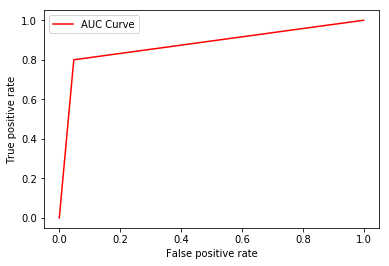

In [55]:
plt.plot(fpr,tpr,c='red')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['AUC Curve'])

In [57]:
confusion_matrix(y_test,y_preds)

array([[20,  8],
       [ 1, 32]], dtype=int64)

Text(33.0, 0.5, 'Predicted Label')

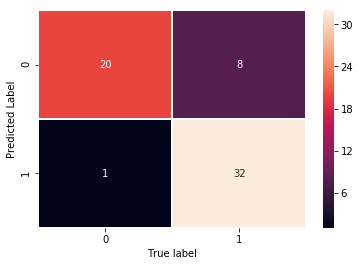

In [64]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,linewidths=.5); 
plt.xlabel("True label")
plt.ylabel("Predicted Label")

In [65]:
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.95      0.71      0.82        28\n           1       0.80      0.97      0.88        33\n\n   micro avg       0.85      0.85      0.85        61\n   macro avg       0.88      0.84      0.85        61\nweighted avg       0.87      0.85      0.85        61\n'

In [66]:
precision_score(y_test,y_preds)

0.8

In [ ]:
recall_score(y_test,y_preds)